In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [3]:
### Explanatory Data Analysis ###

In [4]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 4, 31)

df = web.DataReader("GOOG", 'yahoo', start, end)
df.tail()

ModuleNotFoundError: No module named 'pandas_datareader'

In [5]:
df = pd.read_csv("GOOG.csv", index_col=0)
#print first 10 rows
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2/1/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
3/1/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
4/1/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
5/1/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
8/1/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
9/1/2018,1109.400024,1110.569946,1101.230957,1106.260010,902500
10/1/2018,1097.099976,1104.599976,1096.109985,1102.609985,1042800
11/1/2018,1106.300049,1106.525024,1099.589966,1105.520020,978300
12/1/2018,1102.410034,1124.290039,1101.150024,1122.260010,1720500


In [6]:
# Moving Average (MA) smooths out price data by creating a constantly updated average price. 
# This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
# could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect 
# it will follow the trend and less likely to deviate outside its resistance point.

close_px = df['Close']
mavg = close_px.rolling(window=50).mean()
mavg

Date
2/1/2018              NaN
3/1/2018              NaN
4/1/2018              NaN
5/1/2018              NaN
8/1/2018              NaN
9/1/2018              NaN
10/1/2018             NaN
11/1/2018             NaN
12/1/2018             NaN
16/1/2018             NaN
17/1/2018             NaN
18/1/2018             NaN
19/1/2018             NaN
22/1/2018             NaN
23/1/2018             NaN
24/1/2018             NaN
25/1/2018             NaN
26/1/2018             NaN
29/1/2018             NaN
30/1/2018             NaN
31/1/2018             NaN
1/2/2018              NaN
2/2/2018              NaN
5/2/2018              NaN
6/2/2018              NaN
7/2/2018              NaN
8/2/2018              NaN
9/2/2018              NaN
12/2/2018             NaN
13/2/2018             NaN
                 ...     
14/11/2018    1121.849789
15/11/2018    1119.715189
16/11/2018    1117.648390
19/11/2018    1114.755590
20/11/2018    1111.723590
21/11/2018    1109.219391
23/11/2018    1106.190392
26/11/2

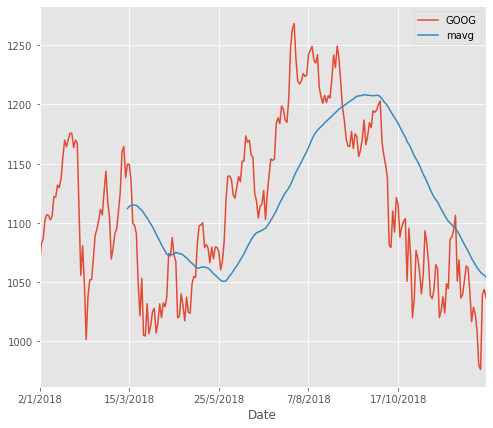

In [7]:
# Plotting the Moving Average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

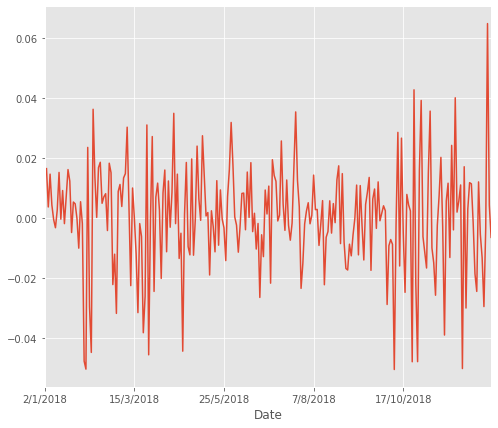

In [8]:
# Measure Expected Return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [9]:
# Feature Engineering

dfreg = df.loc[:,["Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0
dfreg.tail()

,Close,Volume,HL_PCT,PCT_change
Date,,,,
21/12/2018,979.539978,4596000,5.138128,-3.522113
24/12/2018,976.219971,1590300,3.424432,0.238212
26/12/2018,1039.459961,2373300,5.483617,5.101056
27/12/2018,1043.880005,2109800,4.491897,2.627929
28/12/2018,1037.079956,1414800,2.165704,-1.194722


In [10]:
# Pre-processing & Splitting

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

X = dfreg.iloc[:,1:4].values
y = dfreg.iloc[:,0].values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((167, 3), (167,), (83, 3), (83,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [14]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [15]:
# accuracy of model with train set

confidencereg = clfreg.score(X_train, y_train)
confidencepoly2 = clfpoly2.score(X_train, y_train)
confidencepoly3 = clfpoly3.score(X_train, y_train)
confidenceknn = clfknn.score(X_train, y_train)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)


The linear regression accuracy is 0.23238110611357943
The quadratic regression 2 accuracy is 0.26244957764482735
The quadratic regression 3 accuracy is 0.2953543022200569
The knn regression accuracy is 0.6673743063555242


In [17]:
# accuracy of model with test set

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.21676798516289963
The quadratic regression 2 accuracy is 0.2082744642356371
The quadratic regression 3 accuracy is 0.13915101856157863
The knn regression accuracy is -0.25253321735425227


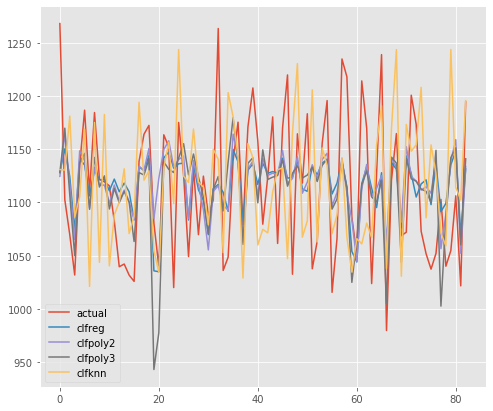

In [18]:
# plot of estimated and actual close price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

y_test = pd.DataFrame(y_test)
y_clfreg = pd.DataFrame(clfreg.predict(X_test))
y_clfpoly2 = pd.DataFrame(clfpoly2.predict(X_test))
y_clfpoly3 = pd.DataFrame(clfpoly3.predict(X_test))
y_clfknn = pd.DataFrame(clfknn.predict(X_test))
plt.plot(y_test, label="actual")
plt.plot(y_clfreg, label="clfreg")
plt.plot(y_clfpoly2, label="clfpoly2")
plt.plot(y_clfpoly3, label="clfpoly3")
plt.plot(y_clfknn, label="clfknn")
plt.legend()

In [ ]:
# Possible reasons of low accuracy:
# - using close value (the DV of the model) as one of the varibales used in to calculate the feature engineering